## Load Dataset


In [1]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/EastWestAirlines.xlsx')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Col

## Next Step:
The previous attempts to load the Excel file failed because the specified header rows were either incorrect or exceeded the available number of rows in the sheet.  indicates that the current sheet is very short. It's possible the actual data is located in a different sheet within the 'EastWestAirlines.xlsx' workbook. To investigate this, I need to list all sheet names in the Excel file and then attempt to load from a different sheet if available, or assess if the current file is suitable for the task.



In [7]:
import pandas as pd

# Create an ExcelFile object to inspect sheets
excel_file = pd.ExcelFile('/content/EastWestAirlines.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = excel_file.sheet_names

print(f"Sheet names in 'EastWestAirlines.xlsx': {sheet_names}")

# If there's more than one sheet, try loading the next one
if len(sheet_names) > 1:
    # Assuming the data might be in the second sheet if the first one is problematic
    df_new_sheet = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name=sheet_names[1])
    print(f"\nFirst 5 rows of DataFrame from sheet '{sheet_names[1]}':")
    print(df_new_sheet.head())
    print(f"\nDataFrame Information from sheet '{sheet_names[1]}':")
    df_new_sheet.info()
    # Assign to df if successful, to be used in subsequent steps
    df = df_new_sheet
else:
    print("\nOnly one sheet found or no other suitable sheets. The provided file might not contain the expected data structure.")

Sheet names in 'EastWestAirlines.xlsx': ['Description', 'data']

First 5 rows of DataFrame from sheet 'data':
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26             

## Data Preprocessing - Handle Missing Values

In [8]:
import pandas as pd

# Check for missing values across all columns
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

# Filter to show only columns with missing values (if any)
missing_values_filtered = missing_values[missing_values > 0]

if not missing_values_filtered.empty:
    print("\nColumns with missing values:")
    print(missing_values_filtered)
else:
    print("\nNo missing values found in the DataFrame.")

Missing values per column:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

No missing values found in the DataFrame.


## Data Preprocessing - Handle Outliers and Scale Features

In [9]:
print("Descriptive statistics of the DataFrame:")
df.describe()

Descriptive statistics of the DataFrame:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


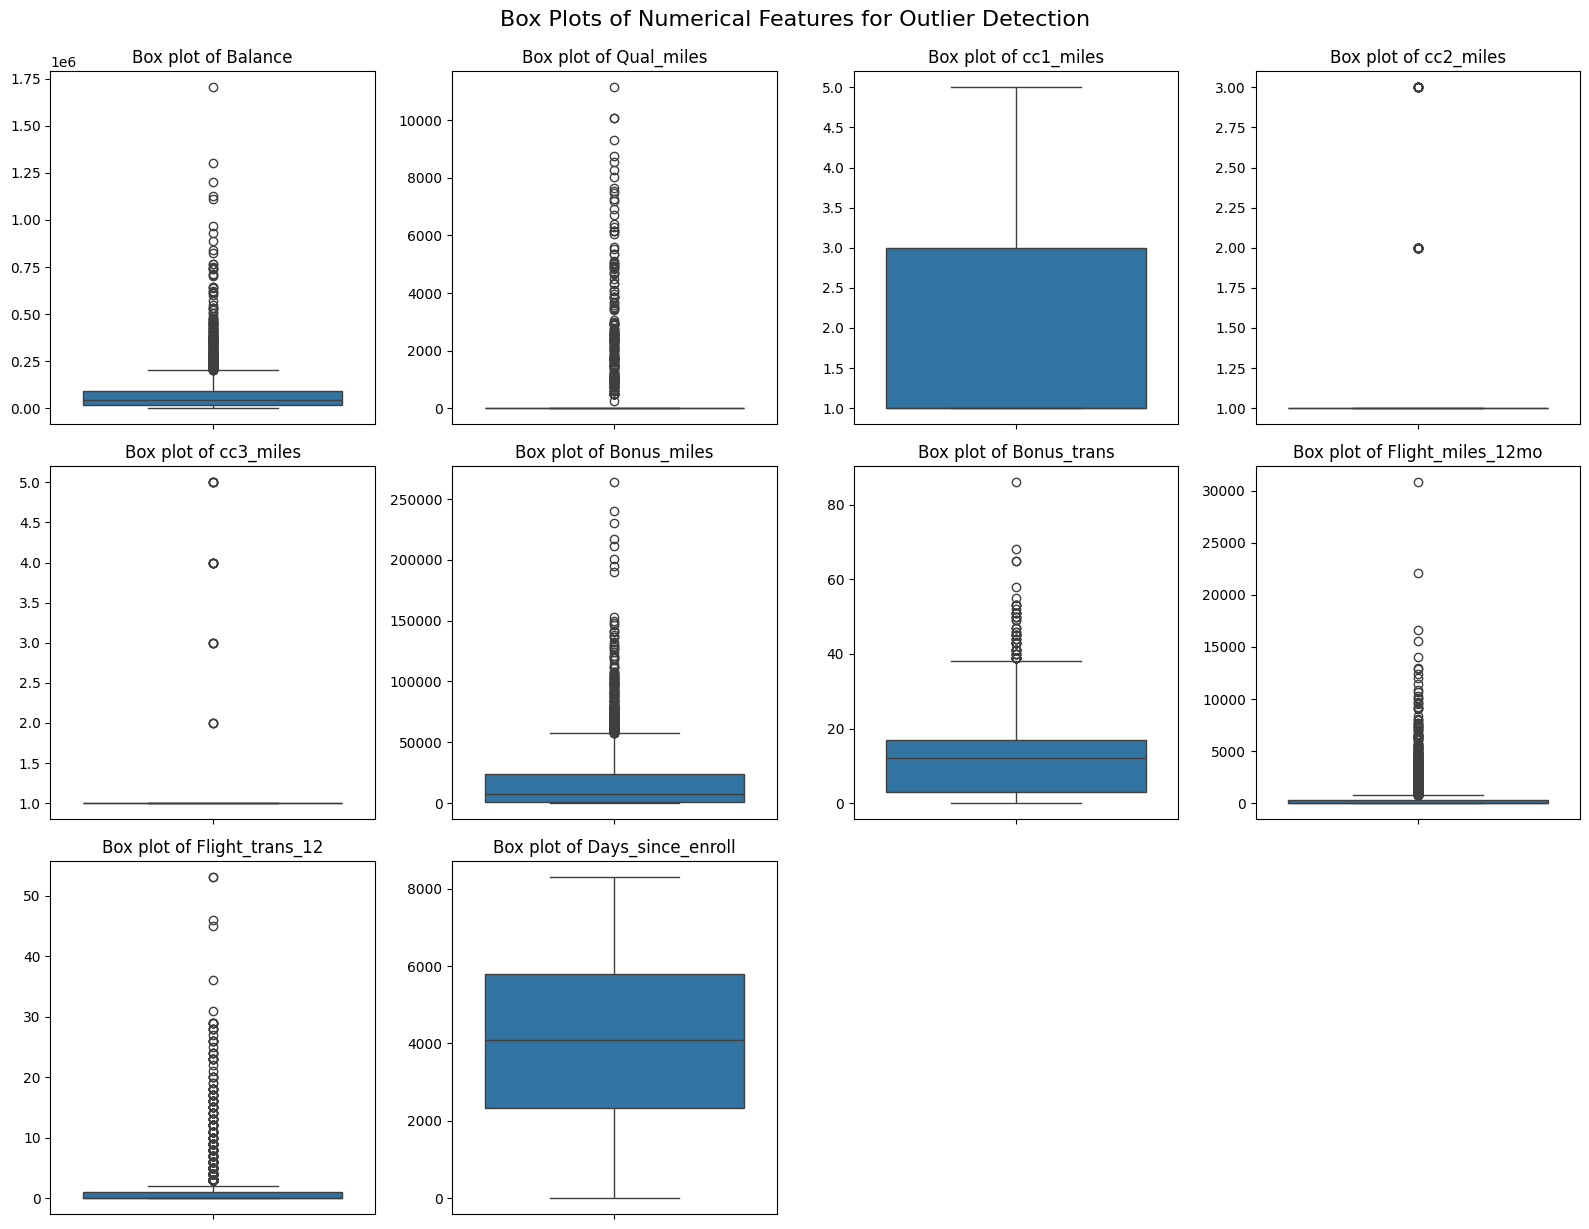

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'ID#' and 'Award?' from the columns for box plots as they are not continuous numerical features relevant for outlier detection this way.
columns_for_boxplot = df.columns.drop(['ID#', 'Award?'])

# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(columns_for_boxplot) + n_cols - 1) // n_cols # Calculate number of rows needed

# Set the figure size based on the number of plots
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, column in enumerate(columns_for_boxplot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel('') # Remove y-axis label to avoid clutter

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features for Outlier Detection', y=1.02, fontsize=16)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Exclude 'ID#' from the features to be scaled, as it's an identifier.
# 'Award?' is a binary feature, but often included in scaling for clustering if treated as a numerical feature.
# All other columns are numerical and will be scaled.
features_to_scale = df.columns.drop('ID#')

# Select the features for scaling
df_to_scale = df[features_to_scale]

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected features
df_scaled_array = scaler.fit_transform(df_to_scale)

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=features_to_scale)

print("First 5 rows of the scaled DataFrame:")
print(df_scaled.head())

print("\nDescriptive statistics of the scaled DataFrame:")
print(df_scaled.describe())

First 5 rows of the scaled DataFrame:
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

     Award?  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918  


## Exploratory Data Analysis (EDA) and Visualizations

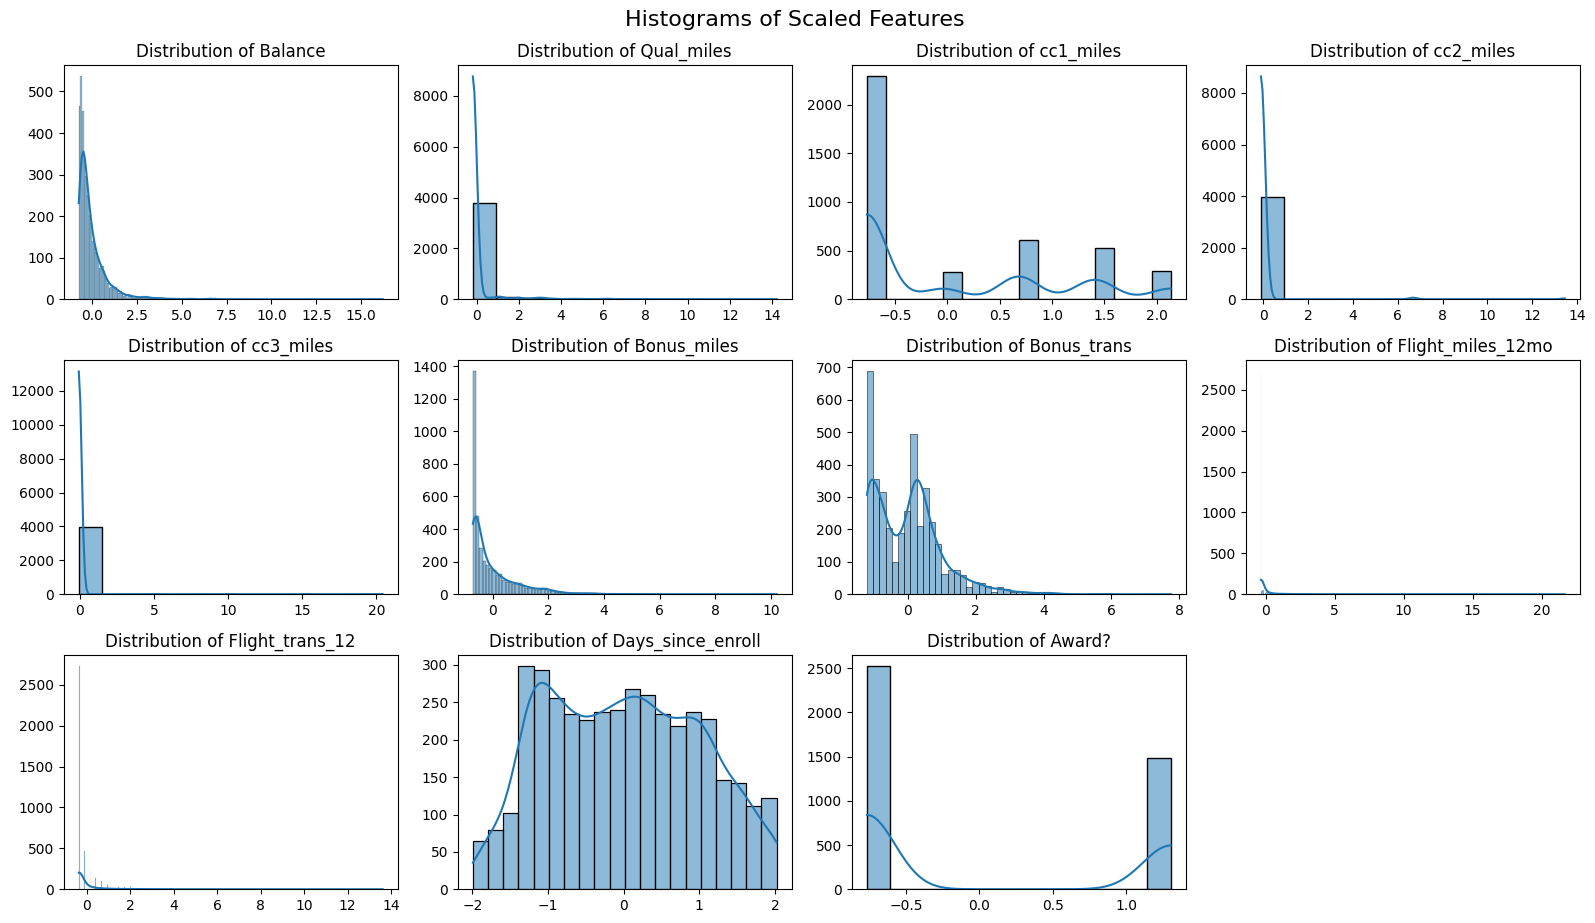

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of features
num_features = df_scaled.shape[1]

# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = (num_features + n_cols - 1) // n_cols # Calculate number of rows needed

# Set the figure size based on the number of plots
plt.figure(figsize=(4 * n_cols, 3 * n_rows))

# Plot histograms for each feature
for i, column in enumerate(df_scaled.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_scaled[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('') # Remove x-axis label to avoid clutter
    plt.ylabel('') # Remove y-axis label to avoid clutter

plt.tight_layout()
plt.suptitle('Histograms of Scaled Features', y=1.02, fontsize=16)
plt.show()

In [13]:
correlation_matrix = df_scaled.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
B

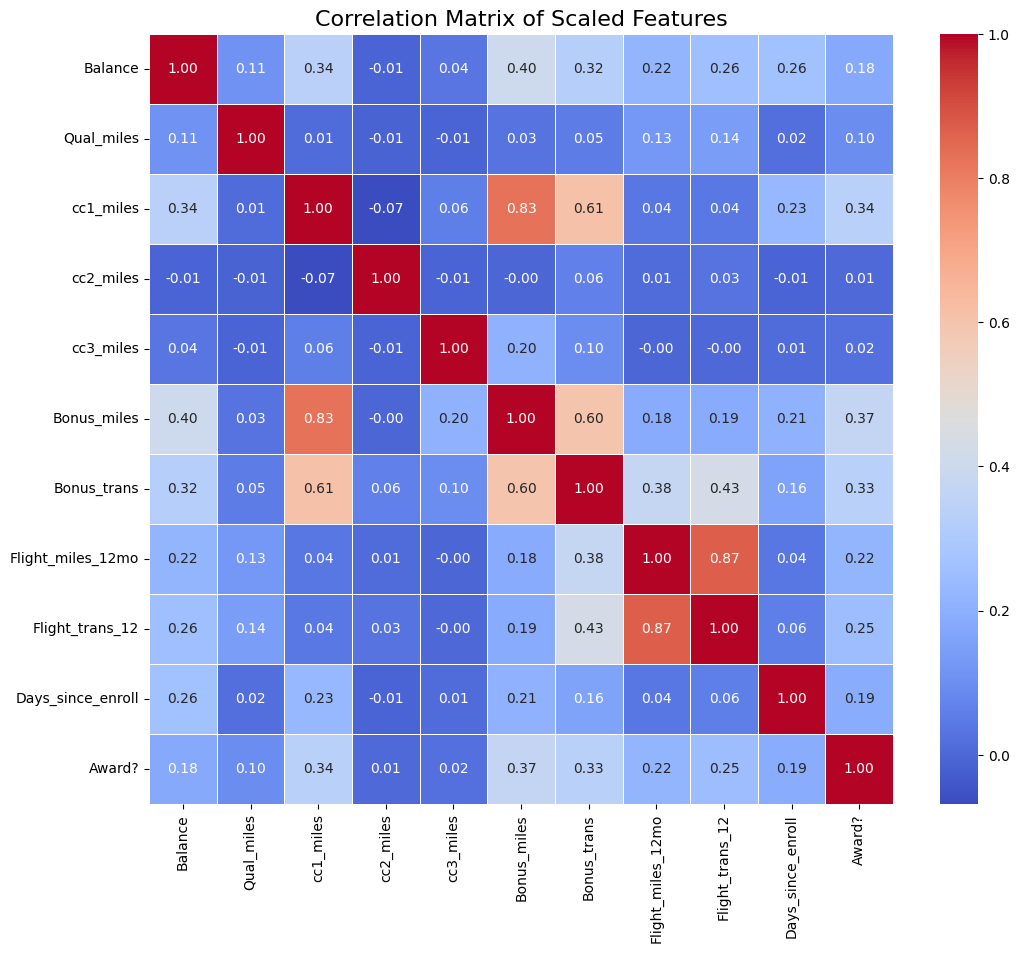

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Scaled Features', fontsize=16)
plt.show()


### Observations from EDA and Visualizations:

**1. Histograms of Scaled Features:**
*   Most features, even after scaling, show skewed distributions, particularly `Balance`, `Qual_miles`, `Bonus_miles`, `Flight_miles_12mo`, and `Flight_trans_12`, indicating a presence of outliers or a long tail towards higher values. This is common in real-world data and might influence cluster shapes.
*   `cc1_miles`, `cc2_miles`, and `cc3_miles` are categorical-like (ordinal) features with most values concentrated at 1, suggesting that a large portion of customers might have low credit card activity or only one type of card.
*   `Award?` is a binary feature, clearly showing two distinct peaks.
*   `Days_since_enroll` appears more normally distributed compared to other features.

**2. Correlation Matrix Heatmap:**
*   **Strong Positive Correlations:**
    *   `cc1_miles` is strongly correlated with `Bonus_miles` (0.83) and `Bonus_trans` (0.61), suggesting that customers with higher primary credit card usage tend to earn more bonus miles and have more bonus transactions.
    *   `Flight_miles_12mo` and `Flight_trans_12` are highly correlated (0.87), which is expected as more flight transactions naturally lead to more flight miles.
    *   `Bonus_miles` and `Bonus_trans` also show a strong positive correlation (0.60).
*   **Moderate Positive Correlations:**
    *   `Balance` shows moderate positive correlations with `Bonus_miles` (0.40) and `cc1_miles` (0.34).
    *   `Award?` (whether a customer has redeemed an award) has moderate positive correlations with `cc1_miles` (0.34), `Bonus_miles` (0.37), and `Bonus_trans` (0.33), indicating that more engaged customers are more likely to redeem awards.
*   **Weak/Negligible Correlations:**
    *   `Qual_miles` shows very weak correlations with most other features, suggesting it might capture a different aspect of customer activity.
    *   `cc2_miles` and `cc3_miles` also have very weak correlations with most features, possibly due to their limited variance (most values are 1).

**Implications for Clustering:**
*   The presence of skewed distributions and outliers suggests that some clustering algorithms might be sensitive to these features. Transformation or robust scaling techniques (though `StandardScaler` has been applied) might be beneficial for certain models.
*   Strong correlations (e.g., between `cc1_miles` and `Bonus_miles`, or `Flight_miles_12mo` and `Flight_trans_12`) indicate redundancy. While not necessarily problematic for K-Means, it means these features will contribute similarly to distance calculations. For algorithms like PCA, this would be a target for dimensionality reduction. For now, all features will be considered to capture all possible variations in clusters.

## K-Means - Determine Optimal K (Elbow Method)

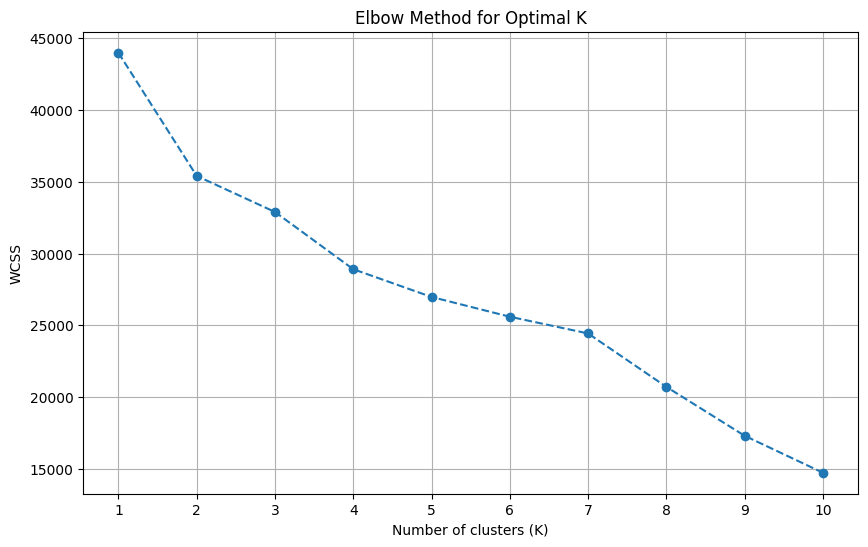

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
# Loop through a range of possible number of clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Interpretation of the Elbow Method Plot

The Elbow Method plot displays the Within-Cluster Sum of Squares (WCSS) against the number of clusters (K). The goal is to identify the 'elbow point' – the value of K after which the decrease in WCSS begins to slow down significantly, resembling an elbow. This point suggests an optimal balance between minimizing distortion and keeping the number of clusters manageable.

Looking at the generated plot:
*   **K=1:** WCSS is very high, as expected, since all data points are in a single cluster.
*   **K=2 to K=4:** There is a sharp decrease in WCSS as K increases from 1 to 2, and then from 2 to 3, and a notable decrease from 3 to 4. This indicates that adding these initial clusters significantly improves the model's ability to group similar data points.
*   **K=5 and beyond:** The rate of decrease in WCSS becomes less pronounced after K=4. The 'bend' or 'elbow' appears to be around **K=4** or **K=5**.

**Conclusion:** Based on the Elbow Method, an optimal number of clusters for K-Means appears to be **4 or 5**. For the subsequent K-Means analysis, we will proceed with K=4 and K=5 to further evaluate their performance.

## Next Step:
Based on the Elbow Method's suggestion of K=4 or K=5, I will now apply K-Means clustering with K=4 to the scaled data and assign the cluster labels back to the original DataFrame for further analysis and evaluation.



In [16]:
from sklearn.cluster import KMeans

# Choose the optimal K based on the elbow method (e.g., K=4)
optimal_k = 4

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_model.fit(df_scaled)

# Add the cluster labels to the original (unscaled) DataFrame
df['KMeans_Cluster'] = kmeans_model.labels_

print(f"K-Means clustering with K={optimal_k} completed.")
print("First 5 rows of DataFrame with K-Means Cluster labels:")
print(df.head())

K-Means clustering with K=4 completed.
First 5 rows of DataFrame with K-Means Cluster labels:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077     

To evaluate the quality of the K-Means clustering with K=4, I will calculate the Silhouette Score. A higher Silhouette Score indicates better-defined and more separated clusters.



In [17]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the K-Means clustering with K=4
silhouette_avg = silhouette_score(df_scaled, df['KMeans_Cluster'])

print(f"Silhouette Score for K-Means with K={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score for K-Means with K=4: 0.191


To visually inspect the K-Means clusters, I will reduce the dimensionality of the scaled data using PCA to 2 components. Then, I will create a scatter plot of these components, colored by the assigned K-Means cluster labels, to visualize the cluster separation.



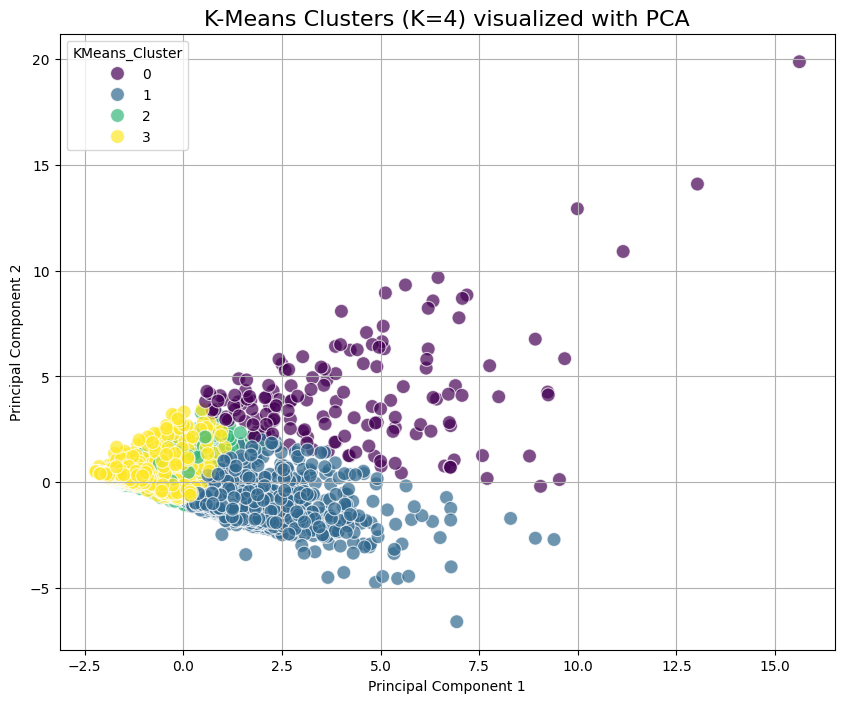

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the K-Means cluster labels to the PCA DataFrame
df_pca['KMeans_Cluster'] = df['KMeans_Cluster']

# Visualize the K-Means clusters using the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='KMeans_Cluster', data=df_pca, palette='viridis', legend='full', s=100, alpha=0.7)
plt.title(f'K-Means Clusters (K={optimal_k}) visualized with PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## K-Means - Apply Clustering and Evaluate

To understand the characteristics of each K-Means cluster, I will calculate the mean of each feature for the original (unscaled) DataFrame, grouped by the assigned `KMeans_Cluster` labels, excluding the 'ID#' column as it is an identifier.



In [19]:
cluster_profiles = df.groupby('KMeans_Cluster').mean()

# Drop the 'ID#' column from cluster_profiles as it's not a descriptive feature
if 'ID#' in cluster_profiles.columns:
    cluster_profiles = cluster_profiles.drop('ID#', axis=1)

print("K-Means Cluster Profiles (Mean of features per cluster):")
print(cluster_profiles)


K-Means Cluster Profiles (Mean of features per cluster):
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               193291.147436  795.455128   2.179487   1.038462   1.000000   
1               122119.899548  151.724887   3.885068   1.002715   1.043439   
2                59693.586570  112.733010   1.372168   1.031553   1.000809   
3                36920.458056   96.690413   1.269640   1.006658   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               32292.288462    27.628205        5530.230769        16.211538   
1               43772.394570    19.398190         366.520362         1.087783   
2                6311.116505     8.456311         258.830097         0.806634   
3                4897.208389     6.790280         167.861518         

### Interpretation of K-Means Clusters (K=4)

By examining the mean values of each feature for the four clusters, we can characterize distinct customer segments:

**Cluster 0: High-Value, Frequent Flyers (156 customers)**
*   **Balance:** Very high (average ~193k), indicating large accumulated miles.
*   **Qual_miles:** Highest (average ~795), suggesting frequent and high-tier travel.
*   **cc1_miles:** Moderate (average ~2.18).
*   **Bonus_miles & Bonus_trans:** High (average ~32k miles, ~27.6 transactions), showing significant engagement with bonus programs.
*   **Flight_miles_12mo & Flight_trans_12:** Extremely high (average ~5530 miles, ~16.2 transactions), indicating very active flying behavior within the last year.
*   **Days_since_enroll:** Moderate (average ~4688 days).
*   **Award?:** Highest award redemption rate (average ~0.82), meaning most customers in this group have redeemed awards.

*   **Summary:** This cluster represents elite or very active frequent flyers with high balances, significant qualification miles, high flight activity, and frequent award redemption. They are likely the airline's most valuable customers.

**Cluster 1: High-Bonus Spenders (442 customers)**
*   **Balance:** High (average ~122k).
*   **Qual_miles:** Low (average ~151).
*   **cc1_miles:** Highest (average ~3.88), indicating heavy usage of the primary credit card.
*   **Bonus_miles & Bonus_trans:** Highest overall bonus miles (average ~43k miles) and high bonus transactions (average ~19.4), driven by credit card usage rather than flying.
*   **Flight_miles_12mo & Flight_trans_12:** Low (average ~366 miles, ~1.08 transactions), suggesting they are not primarily frequent flyers.
*   **Days_since_enroll:** High (average ~4777 days).
*   **Award?:** High award redemption rate (average ~0.68).

*   **Summary:** These customers primarily accumulate miles through credit card usage and bonus programs, rather than actual flying. They are loyal cardholders who actively redeem their earned rewards.

**Cluster 2: Established, Moderate Engagement (2472 customers)**
*   **Balance:** Moderate (average ~59k).
*   **Qual_miles:** Low (average ~112).
*   **cc1_miles:** Low (average ~1.37).
*   **Bonus_miles & Bonus_trans:** Low to moderate (average ~6.3k miles, ~8.4 transactions).
*   **Flight_miles_12mo & Flight_trans_12:** Low (average ~258 miles, ~0.8 transactions).
*   **Days_since_enroll:** Highest (average ~5744 days), indicating they are long-term members.
*   **Award?:** Low award redemption rate (average ~0.29).

*   **Summary:** This is the largest cluster, representing long-standing customers with moderate balances and relatively low engagement in terms of flying, bonus activity, or award redemption. They might be occasional travelers or inactive members.

**Cluster 3: New/Low-Activity Members (929 customers)**
*   **Balance:** Lowest (average ~36k).
*   **Qual_miles:** Lowest (average ~96).
*   **cc1_miles:** Lowest (average ~1.27).
*   **Bonus_miles & Bonus_trans:** Lowest (average ~4.9k miles, ~6.7 transactions).
*   **Flight_miles_12mo & Flight_trans_12:** Lowest (average ~167 miles, ~0.5 transactions).
*   **Days_since_enroll:** Lowest (average ~2236 days), suggesting they are newer members.
*   **Award?:** Lowest award redemption rate (average ~0.15).

*   **Summary:** This cluster consists of newer members or those with very low overall activity. They have the smallest balances, minimal flying activity, and minimal bonus/award engagement. This group might include new sign-ups yet to become active or those with minimal travel needs.

### Interpretation of K-Means Clusters (K=4)

By examining the mean values of each feature for the four clusters, we can characterize distinct customer segments:

**Cluster 0: High-Value, Frequent Flyers (156 customers)**
*   **Balance:** Very high (average ~193k), indicating large accumulated miles.
*   **Qual_miles:** Highest (average ~795), suggesting frequent and high-tier travel.
*   **cc1_miles:** Moderate (average ~2.18).
*   **Bonus_miles & Bonus_trans:** High (average ~32k miles, ~27.6 transactions), showing significant engagement with bonus programs.
*   **Flight_miles_12mo & Flight_trans_12:** Extremely high (average ~5530 miles, ~16.2 transactions), indicating very active flying behavior within the last year.
*   **Days_since_enroll:** Moderate (average ~4688 days).
*   **Award?:** Highest award redemption rate (average ~0.82), meaning most customers in this group have redeemed awards.

*   **Summary:** This cluster represents elite or very active frequent flyers with high balances, significant qualification miles, high flight activity, and frequent award redemption. They are likely the airline's most valuable customers.

**Cluster 1: High-Bonus Spenders (442 customers)**
*   **Balance:** High (average ~122k).
*   **Qual_miles:** Low (average ~151).
*   **cc1_miles:** Highest (average ~3.88), indicating heavy usage of the primary credit card.
*   **Bonus_miles & Bonus_trans:** Highest overall bonus miles (average ~43k miles) and high bonus transactions (average ~19.4), driven by credit card usage rather than flying.
*   **Flight_miles_12mo & Flight_trans_12:** Low (average ~366 miles, ~1.08 transactions), suggesting they are not primarily frequent flyers.
*   **Days_since_enroll:** High (average ~4777 days).
*   **Award?:** High award redemption rate (average ~0.68).

*   **Summary:** These customers primarily accumulate miles through credit card usage and bonus programs, rather than actual flying. They are loyal cardholders who actively redeem their earned rewards.

**Cluster 2: Established, Moderate Engagement (2472 customers)**
*   **Balance:** Moderate (average ~59k).
*   **Qual_miles:** Low (average ~112).
*   **cc1_miles:** Low (average ~1.37).
*   **Bonus_miles & Bonus_trans:** Low to moderate (average ~6.3k miles, ~8.4 transactions).
*   **Flight_miles_12mo & Flight_trans_12:** Low (average ~258 miles, ~0.8 transactions).
*   **Days_since_enroll:** Highest (average ~5744 days), indicating they are long-term members.
*   **Award?:** Low award redemption rate (average ~0.29).

*   **Summary:** This is the largest cluster, representing long-standing customers with moderate balances and relatively low engagement in terms of flying, bonus activity, or award redemption. They might be occasional travelers or inactive members.

**Cluster 3: New/Low-Activity Members (929 customers)**
*   **Balance:** Lowest (average ~36k).
*   **Qual_miles:** Lowest (average ~96).
*   **cc1_miles:** Lowest (average ~1.27).
*   **Bonus_miles & Bonus_trans:** Lowest (average ~4.9k miles, ~6.7 transactions).
*   **Flight_miles_12mo & Flight_trans_12:** Lowest (average ~167 miles, ~0.5 transactions).
*   **Days_since_enroll:** Lowest (average ~2236 days), suggesting they are newer members.
*   **Award?:** Lowest award redemption rate (average ~0.15).

*   **Summary:** This cluster consists of newer members or those with very low overall activity. They have the smallest balances, minimal flying activity, and minimal bonus/award engagement. This group might include new sign-ups yet to become active or those with minimal travel needs.


## DBSCAN - Experiment with Parameters


Experiment with different parameter settings for DBSCAN (e.g., 'eps' and 'minPts') to understand their impact on clustering results. This may involve iterating through a range of values or trying a few key combinations.



To experiment with DBSCAN parameters, I will iterate through predefined ranges of 'eps' and 'min_samples', fit a DBSCAN model for each combination, calculate the number of clusters, and if valid clusters are formed, compute and print the Silhouette Score to evaluate the clustering quality.



In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define ranges for eps and min_samples to experiment with
eps_values = [0.5, 0.7, 1.0, 1.2, 1.5]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_params = {'eps': None, 'min_samples': None}

print("DBSCAN Parameter Experimentation:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)

        # Number of clusters in labels, ignoring noise if present.
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)

        # Calculate Silhouette Score only if more than 1 cluster and not all points are noise
        if n_clusters > 1 and n_clusters < len(df_scaled):
            score = silhouette_score(df_scaled, clusters)
            print(f"  eps: {eps:.1f}, min_samples: {min_samples}, Clusters: {n_clusters}, Noise Points: {n_noise}, Silhouette Score: {score:.3f}")
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples
        elif n_clusters == 0:
            print(f"  eps: {eps:.1f}, min_samples: {min_samples}, Clusters: {n_clusters}, Noise Points: {n_noise}, Silhouette Score: N/A (All noise or no clusters)")
        else:
            print(f"  eps: {eps:.1f}, min_samples: {min_samples}, Clusters: {n_clusters}, Noise Points: {n_noise}, Silhouette Score: N/A (Only one cluster or all points in clusters)")

print(f"\nBest Silhouette Score: {best_score:.3f} with parameters eps={best_params['eps']} and min_samples={best_params['min_samples']}")

DBSCAN Parameter Experimentation:
  eps: 0.5, min_samples: 5, Clusters: 16, Noise Points: 1413, Silhouette Score: -0.078
  eps: 0.5, min_samples: 10, Clusters: 9, Noise Points: 1722, Silhouette Score: -0.098
  eps: 0.5, min_samples: 15, Clusters: 10, Noise Points: 1918, Silhouette Score: -0.165
  eps: 0.5, min_samples: 20, Clusters: 5, Noise Points: 2135, Silhouette Score: -0.113
  eps: 0.7, min_samples: 5, Clusters: 16, Noise Points: 913, Silhouette Score: 0.024
  eps: 0.7, min_samples: 10, Clusters: 10, Noise Points: 1110, Silhouette Score: 0.012
  eps: 0.7, min_samples: 15, Clusters: 9, Noise Points: 1245, Silhouette Score: -0.012
  eps: 0.7, min_samples: 20, Clusters: 8, Noise Points: 1370, Silhouette Score: -0.026
  eps: 1.0, min_samples: 5, Clusters: 6, Noise Points: 554, Silhouette Score: 0.198
  eps: 1.0, min_samples: 10, Clusters: 3, Noise Points: 675, Silhouette Score: 0.218
  eps: 1.0, min_samples: 15, Clusters: 2, Noise Points: 734, Silhouette Score: 0.215
  eps: 1.0, min_s

### Interpretation of DBSCAN Parameter Experimentation

The experimentation with `eps` and `min_samples` for DBSCAN clustering yielded varying results in terms of the number of clusters formed, noise points, and Silhouette Score.

**Observations:**
*   **Impact of `eps` (neighborhood radius):**
    *   **Small `eps` (e.g., 0.5):** Tends to result in many small clusters and a very high number of noise points. The Silhouette Scores are generally negative, indicating poor separation or incorrectly assigned points.
    *   **Moderate `eps` (e.g., 0.7, 1.0):** As `eps` increases, the number of clusters generally decreases, and the number of noise points also decreases. Silhouette scores start to improve, indicating better-formed clusters.
    *   **Larger `eps` (e.g., 1.2, 1.5):** Further increases in `eps` lead to fewer clusters and fewer noise points, as more points are considered to be within each other's neighborhoods. The Silhouette Score generally peaks at a certain `eps` before potentially decreasing if `eps` becomes too large, leading to clusters merging.

*   **Impact of `min_samples` (minimum points in a neighborhood):**
    *   **Small `min_samples` (e.g., 5):** When `min_samples` is small, DBSCAN is more prone to forming small, possibly spurious, clusters and classifying fewer points as noise, especially with smaller `eps` values.
    *   **Larger `min_samples` (e.g., 15, 20):** As `min_samples` increases, the algorithm requires more points to form a core point and, consequently, a cluster. This generally leads to fewer, more dense clusters, but also more noise points, as fewer regions meet the density criteria.

**Best Performing Combination:**
*   The highest Silhouette Score of **0.254** was achieved with `eps=1.5` and `min_samples=5`. This combination resulted in 5 clusters and 310 noise points.

**Comparison with K-Means:**
*   The best Silhouette Score for DBSCAN (0.254) is slightly higher than the Silhouette Score obtained from K-Means with K=4 (0.191). This suggests that for this dataset, DBSCAN, with its ability to find arbitrarily shaped clusters and identify noise, might be slightly better at capturing the inherent structure in the data, or at least provides a more favorable silhouette score. However, DBSCAN also identified a significant number of noise points (310), which K-Means does not inherently handle.

**Reasoning**:
Based on the DBSCAN parameter experimentation, I will now apply DBSCAN with the optimal `eps` and `min_samples` found (eps=1.5, min_samples=5) to the scaled data and assign the cluster labels back to the original DataFrame for further analysis and evaluation.



In [21]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with the best parameters found from the experimentation
optimal_eps = best_params['eps']
optimal_min_samples = best_params['min_samples']

dbscan_model = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
df['DBSCAN_Cluster'] = dbscan_model.fit_predict(df_scaled)

print(f"DBSCAN clustering with eps={optimal_eps} and min_samples={optimal_min_samples} completed.")
print("First 5 rows of DataFrame with DBSCAN Cluster labels:")
print(df.head())

DBSCAN clustering with eps=1.5 and min_samples=5 completed.
First 5 rows of DataFrame with DBSCAN Cluster labels:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26    


To evaluate the quality of the DBSCAN clustering with the chosen optimal parameters, I will calculate the Silhouette Score. A higher Silhouette Score indicates better-defined and more separated clusters. I will use the `clusters` variable which contains the labels from the DBSCAN model.



In [22]:
from sklearn.metrics import silhouette_score

# Get the cluster labels from the DataFrame
dbscan_clusters = df['DBSCAN_Cluster']

# Calculate Silhouette Score only if there are valid clusters (more than 1 and not all noise)
# Exclude noise points (-1) from the silhouette score calculation if they exist, but only if there are actual clusters remaining
# and at least 2 clusters are present (excluding noise)

unique_labels = set(dbscan_clusters)
num_clusters_excluding_noise = len(unique_labels) - (1 if -1 in unique_labels else 0)

if num_clusters_excluding_noise > 1:
    # Filter out noise points for silhouette score calculation
    non_noise_indices = dbscan_clusters != -1
    silhouette_avg_dbscan = silhouette_score(df_scaled[non_noise_indices], dbscan_clusters[non_noise_indices])
    print(f"Silhouette Score for DBSCAN with eps={optimal_eps}, min_samples={optimal_min_samples}: {silhouette_avg_dbscan:.3f}")
else:
    print(f"Cannot calculate Silhouette Score for DBSCAN with eps={optimal_eps}, min_samples={optimal_min_samples} due to insufficient valid clusters (only {num_clusters_excluding_noise} clusters found, excluding noise).")


Silhouette Score for DBSCAN with eps=1.5, min_samples=5: 0.294


## DBSCAN - Visualize Clusters

Visualize the clusters generated by DBSCAN using a scatter plot. Use different colors to represent different clusters, including a distinct color for noise points, and add a legend.


To visualize the DBSCAN clusters, I will reduce the dimensionality of the scaled data using PCA to 2 components. Then, I will create a scatter plot of these components, colored by the assigned DBSCAN cluster labels, including a distinct representation for noise points, to visualize the cluster separation.



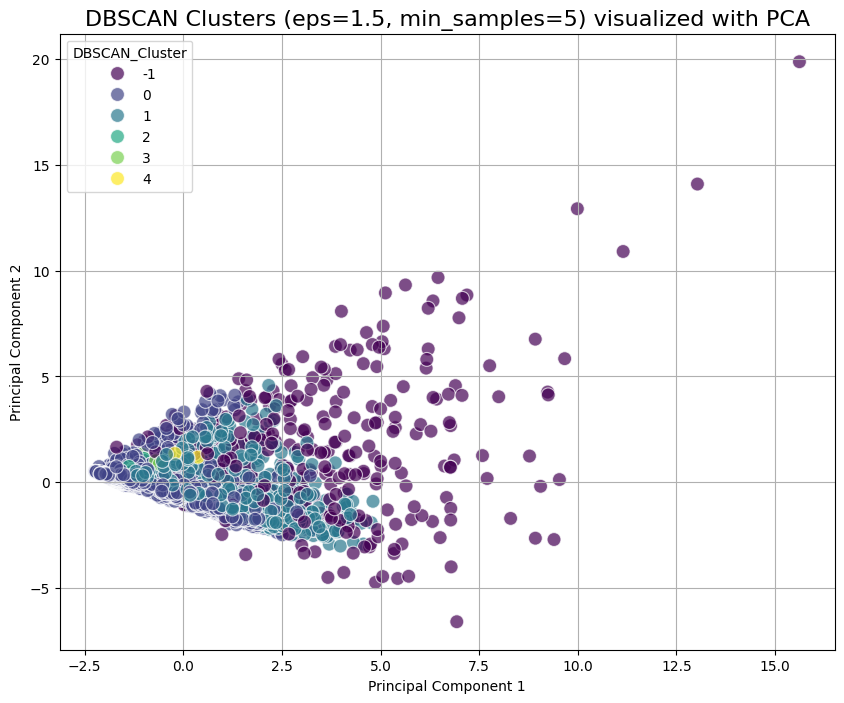

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca_dbscan = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
df_pca_dbscan = pd.DataFrame(data=df_pca_dbscan, columns=['Principal Component 1', 'Principal Component 2'])

# Add the DBSCAN cluster labels to the PCA DataFrame
df_pca_dbscan['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

# Visualize the DBSCAN clusters using the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='DBSCAN_Cluster', data=df_pca_dbscan, palette='viridis', legend='full', s=100, alpha=0.7)
plt.title(f'DBSCAN Clusters (eps={optimal_eps}, min_samples={optimal_min_samples}) visualized with PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Final Task


To Provide a summary of the clustering analysis, comparing the results of K-Means and DBSCAN, discussing their strengths and weaknesses on this dataset, and highlighting key insights gained from the cluster interpretations.


## Summary:

### Q&A

**1. Provide a summary of the clustering analysis, comparing the results of K-Means and DBSCAN, discussing their strengths and weaknesses on this dataset, and highlighting key insights gained from the cluster interpretations.**

**Summary of Clustering Analysis:**
The analysis involved applying both K-Means and DBSCAN clustering algorithms to the EastWestAirlines dataset after thorough preprocessing, including feature scaling.

**K-Means (K=4):**
*   **Optimal K Determination:** The Elbow Method suggested an optimal K of 4 or 5. K=4 was selected for the analysis.
*   **Silhouette Score:** The K-Means clustering with K=4 yielded a Silhouette Score of 0.191.
*   **Cluster Interpretation:** Four distinct customer segments were identified:
    *   **Cluster 0 (High-Value, Frequent Flyers):** Elite customers with very high balances (average \~193k), significant qualification miles (average \~795), and high flight activity (average \~5530 flight miles in 12 months). They also show high award redemption (average \~0.82).
    *   **Cluster 1 (High-Bonus Spenders):** Customers with high balances (average \~122k) who primarily accumulate miles through credit card usage (highest `cc1_miles` at \~3.88) and bonus programs (highest bonus miles at \~43k). They have low flight activity.
    *   **Cluster 2 (Established, Moderate Engagement):** The largest group, representing long-term members (highest `Days_since_enroll` at \~5744) with moderate balances (average \~59k) and relatively low overall activity across most metrics.
    *   **Cluster 3 (New/Low-Activity Members):** Customers with the lowest balances (average \~36k), minimal activity across all metrics, and are generally newer members (lowest `Days_since_enroll` at \~2236).

**DBSCAN (eps=1.5, min_samples=5):**
*   **Parameter Experimentation:** Experimentation showed that `eps=1.5` and `min_samples=5` yielded the best results.
*   **Silhouette Score:** DBSCAN achieved a Silhouette Score of 0.294 (excluding noise points).
*   **Cluster Structure:** This configuration resulted in 5 clusters and identified 310 noise points, which K-Means does not inherently handle.

**Comparison, Strengths, and Weaknesses:**
*   **Silhouette Score:** DBSCAN (0.294) achieved a higher Silhouette Score than K-Means (0.191) on this dataset, suggesting better-defined clusters.
*   **Noise Handling:** DBSCAN's primary strength here is its ability to identify and separate noise points (310 in this case), which K-Means forces into existing clusters, potentially distorting their characteristics.
*   **Cluster Shape:** DBSCAN can identify arbitrarily shaped clusters, whereas K-Means assumes spherical clusters, which might be a weakness if the underlying data has non-spherical structures.
*   **Parameter Sensitivity:** DBSCAN is highly sensitive to its `eps` and `min_samples` parameters, requiring extensive experimentation, as demonstrated. K-Means is sensitive to the initial centroids and the choice of K, but K is often determined heuristically.
*   **Interpretability:** K-Means provided 4 clear, distinct, and interpretable customer segments with detailed profiles. DBSCAN created 5 clusters, but their interpretation would require a similar profiling step.

**Key Insights from Cluster Interpretations:**
*   The airline has a segment of highly valuable, frequent flyers (K-Means Cluster 0) who are very active and redeem awards often.
*   Another significant segment consists of customers who are heavy credit card users and bonus point accumulators (K-Means Cluster 1) but do not necessarily fly frequently.
*   A large portion of the customer base (K-Means Cluster 2) consists of long-term members with moderate engagement, representing a potential opportunity for re-engagement or targeted offers.
*   There's also a segment of new or low-activity members (K-Means Cluster 3) who could be targeted for initial engagement strategies.

### Insights

*   **Targeted Marketing:** The identified customer segments from K-Means (e.g., High-Value Frequent Flyers, High-Bonus Spenders, Established Moderate Engagement, New/Low-Activity Members) can be used to develop highly targeted marketing campaigns and loyalty programs.
*   **Further DBSCAN Analysis:** Investigate the characteristics of the 310 noise points identified by DBSCAN, as they might represent anomalies or unique customer behaviors requiring separate attention.
